In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from numpy import random
import math
from statistics import mean
from scipy.signal import argrelextrema

## Loading boston dataset to use in SkLearn Linear regression and custom Linear regression

In [2]:
boston=load_boston()
bos = pd.DataFrame(boston.data)

bos['PRICE'] = load_boston().target

X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']
Y = Y.values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)

In [19]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Defining MSE loss function

In [3]:
def sq_error(ys_orig, ys_line):
  return ((np.sum(np.subtract(ys_line,ys_orig)**2)/len(ys_orig)))

## Using SKlearn Linear regression and getting MSE for it

In [45]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

print('error with skleran algorithm {}'.format(sq_error(Y_test,Y_pred)))

error with skleran algorithm 28.530458765974608


## Formulating Custom Linear regression model

In [ ]:
''' Mathematical formulation of 
linear regression'''


def add_1_to_start(mat):
  r,c=mat.shape
  mat=np.c_[ mat, np.ones(r) ] 
  mat[:,[0,-1]]=mat[:,[-1,0]]
  return mat



def best_fit_parameter(xs,ys):
  xs=add_1_to_start(xs)

  beta= np.linalg.inv(xs.T.dot(xs)).dot(xs.T.dot(ys))


  return beta




## Getting MSE for Custom Linear Regression model

In [ ]:
weights= best_fit_parameter(X_train,Y_train)


reg_lr =add_1_to_start(X_test).dot(weights)

print('error with devised algorithm {}'.format(sq_error(Y_test,reg_lr)))

error with devised algorithm 28.53045876597665


## Loading Anew the boston dataset to work with SGD

In [ ]:
boston=load_boston()
bos = pd.DataFrame(boston.data)

bos['PRICE'] = load_boston().target

X = bos.drop('PRICE', axis = 1)
Y_B= bos['PRICE']
Y_B=Y_B.values.reshape(-1,1)

## Finding the importance of each column 

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

feature= ExtraTreesRegressor()
fit= feature.fit(X,Y)

series= pd.DataFrame(data={'feature':X.columns,'score':fit.feature_importances_})
series=series.nlargest(13,'score')
series

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


,feature,score
5,5,0.349578
12,12,0.319401
10,10,0.059426
9,9,0.046548
4,4,0.043025
2,2,0.036391
7,7,0.033221
0,0,0.027991
8,8,0.022631
6,6,0.021163


## Making a new dataframe with columns in decreasing order of importance

In [ ]:
df_feature = pd.DataFrame()
count=0
for i,feat in enumerate(series['feature']):
  df_feature[i]= X[feat]


In [ ]:
df_feature.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,6.575,4.98,15.3,296.0,0.538,2.31,4.0900,0.00632,1.0,65.2,0.0,396.9,18.0
1,6.421,9.14,17.8,242.0,0.469,7.07,4.9671,0.02731,2.0,78.9,0.0,396.9,0.0


## Using only top 8 columns of importance

In [ ]:
X_New=df_feature.iloc[:,:8]
Y_New=Y_B

In [ ]:
print(Y_New.shape)
print(X_New.shape)

(506, 1)
(506, 8)


## Defining A function to determine Learning rate with iterations

In [ ]:
def step_decay(it):
   initial_lrate = 0.00000000001
   drop = 0.5
   it_drop = 1000.0
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+it)/it_drop))
   return lrate

In [ ]:
def step_decay2(it):
   initial_lrate = 0.0000000000000001
   drop = 0.5
   it_drop = 1000.0
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+it)/it_drop))
   return lrate

## Defining a function which will run a batch of data through it and return the weight update which has the least train error (trying to mimic checkpoints in keras)

In [ ]:
def update(x_data, X, y_data, Y, beta,lr_func):

  it = 0
  
  x=x_data
  y=y_data
  b_deriv = np.full((len(x[0]),1),0)

  learning_rate = lr_func(it)
  error_tr=[]
  b0= beta[:x.shape[1]]
  b=[]
  while True:
    
    error_tr.append(sq_error(y,x.dot(b0)))
    b.append(b0)

   #adding l2 regularizer derivative too 
    lam=b0.T.dot(b0)    
    
    b_deriv = b_deriv+(-2*(x.T.dot(y-x.dot(b0)))) + lam*2*b0
    
    b1 = b0 - (b_deriv * learning_rate)
    
    #running itereations for  20k times
    if it==20000:
      if b0.all()==b1.all():
        return b0
        break

      else:
        return b[np.argmin(error_tr)]
        break

    else:
      it += 1
      b0 = b1
      learning_rate= lr_func(it)


## Defining SGD to pass batchs of size 'n' to update function resulting in an epoch

In [ ]:
def SGD(X1, Y1,beta,lr_func):
  
  error_tr = []
  error_ts = []
  
  global X, Y

  
  xtr=X1

  
  ytr = Y1
  
  N=len(xtr)
  minn=np.inf
  k=0
  n=100
  for i in range((N//n)+1):
    if N>k:
      k+=n

      beta=update(xtr[k-n:k],X,ytr[k-n:k],Y,beta,lr_func)
      # error_tr.extend(tr)
      # error_ts.extend(ts)
      tr=sq_error(ytr,xtr.dot(beta))
      ts=sq_error(Y,X.dot(beta))
      if minn>tr:
        minn=tr
        min2=ts
        beta_min=beta

      # error_ts.append(ts)
      # error_tr.append(tr)
      
    else:
      


      beta=update(xtr[k-n:N],X,ytr[k-n:N],Y,beta,lr_func)
      # error_tr.extend(tr)
      # error_ts.extend(ts)
      tr=sq_error(ytr,xtr.dot(beta))
      ts=sq_error(Y,X.dot(beta))
      if minn>tr:
        minn=tr
        min2=ts
        beta_min=beta

      # error_ts.append(ts)
      # error_tr.append(tr)
      
  return beta_min

## Data preprocessing

In [ ]:
#preprocessing data
xtr, X, ytr, Y = train_test_split(X_New,Y_New, test_size = 0.33)

ss= StandardScaler(with_mean= False)
xtr=ss.fit_transform(xtr)
X=ss.transform(X)

xtr=add_1_to_start(xtr)
X=add_1_to_start(X)

In [ ]:
#initializing stuff
tr=[]
ts=[]

lr_func=step_decay
epoch=0
flag_change = False

## Running SGD on randomly initialized weights 

In [ ]:
c=SGD(xtr,ytr, np.random.randint(0,100, size=(14,1)),lr_func)
ts.append(sq_error(Y,X.dot(c)))
tr.append(sq_error(ytr,xtr.dot(c)))

epoch+=1
print('for epoch {} the train score is {} and test score is {}'.format(epoch,tr[-1],ts[-1]))



while True:

  if epoch >= 2 and not(flag_change):
    if float("{:.2f}".format(tr[-1]))==float("{:.2f}".format(tr[-2])) or float("{:.5f}".format(tr[-1]))>float("{:.5f}".format(tr[-2])):
      lr_func= step_decay2
      flag_change= True
      print('learnig fuction changed to step_decay2')
    

    
  c=SGD(xtr,ytr,c,lr_func)
  ts.append(sq_error(Y,X.dot(c)))
  tr.append(sq_error(ytr,xtr.dot(c)))
  epoch+=1
  print('for epoch {} the train score is {} and test score is {}'.format(epoch,tr[-1],ts[-1]))

  
    

  if ts[-1]==ts[-2] or ts[-1]< 24:
    zeros_sgd= X.dot(c)
    pass


  else:
    
    c=SGD(xtr,ytr,c,lr_func)
    ts.append(sq_error(Y,X.dot(c)))
    tr.append(sq_error(ytr,xtr.dot(c)))
    epoch+=1
    print('for epoch {} the train score is {} and test score is {}'.format(epoch,tr[-1],ts[-1]))

    


for epoch 1 the train score is 1162.4983495834683 and test score is 1189.4192008053915
for epoch 2 the train score is 745.3830561680218 and test score is 767.6103366750067
for epoch 3 the train score is 545.0978496345091 and test score is 567.4903129862008
for epoch 4 the train score is 426.28218914504896 and test score is 448.1959498009902
for epoch 5 the train score is 347.48921603671437 and test score is 368.60461865693065
for epoch 6 the train score is 291.54891139064455 and test score is 311.7114311532534
for epoch 7 the train score is 249.96202585310667 and test score is 269.1042618635233
for epoch 8 the train score is 218.0018205163483 and test score is 236.10491893707874
for epoch 9 the train score is 192.81382579845672 and test score is 209.88703787308785
for epoch 10 the train score is 172.56524593533382 and test score is 188.6343888934054
for epoch 11 the train score is 156.02235682973395 and test score is 171.12295537511915
for epoch 12 the train score is 142.32308527825066

KeyboardInterrupt: ignored

## Forcefully interrupted the loop with keyboard interrupt as no progress can be seen

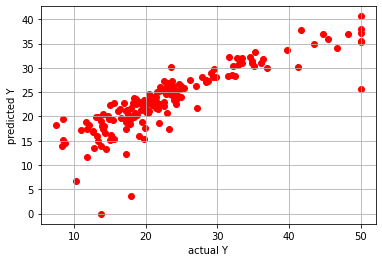

In [ ]:
plt.scatter(Y,X.dot(c), color='r')
plt.xlabel('actual Y')
plt.ylabel('predicted Y')
plt.grid()

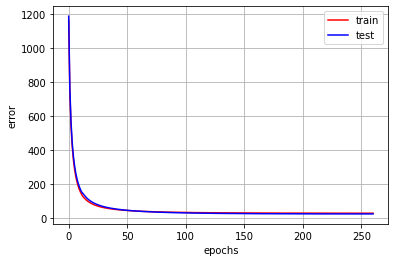

In [ ]:
plt.plot(tr, color='r',label='train')
plt.plot(ts, color='b', label= 'test')
plt.ylabel('error')
plt.xlabel('epochs')
plt.legend()
plt.grid()

In [ ]:
'''we see TRAIN ERROR HIGHER THAN TEST ERROR as model generalizes well enough
but Test data size is too small hence these reults'''  

print('Train error {}'.format(sq_error(ytr,xtr.dot(c))))

print('Test error {}'.format(sq_error(Y,X.dot(c))))


Train error 30.826191962608732
Test error 26.702398375090453


In [ ]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["S.NO.", "MODEL",  "Error value"]
x.add_row(["1", "Skleran Algorithm", sq_error(Y_test,Y_pred)])
x.add_row(["2", "Formulated Algorithm", sq_error(Y_test,reg_lr)])
x.add_row(["3", "SGD with random weights initialization",sq_error(Y,X.dot(c))])

In [ ]:
print(x)

+-------+----------------------------------------+--------------------+
| S.NO. |                 MODEL                  |    Error value     |
+-------+----------------------------------------+--------------------+
|   1   |           Skleran Algorithm            | 28.530458765974597 |
|   2   |          Formulated Algorithm          | 28.53045876597665  |
|   3   | SGD with random weights initialization | 26.702398375090453 |
+-------+----------------------------------------+--------------------+
